In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def crop_black_slices_2d(data):
        if np.count_nonzero(data) == 0:
                return [], []
        
        right, left, top, down = data.shape[1]-1, 0, 0, data.shape[0]-1

        while np.count_nonzero(data[:, left]) == 0:
                left += 1

        while np.count_nonzero(data[:, right]) == 0:
                right -= 1

        while np.count_nonzero(data[top, :]) == 0:
                top += 1

        while np.count_nonzero(data[down, :]) == 0:
                down -= 1

        data_2d = data[top:down, left:right]

        return data_2d, [left, right, top, down]

In [9]:
def move_grid(data, rect):
        y1, y2, x1, x2 = rect[0], rect[1], rect[2], rect[3]

        while np.count_nonzero(data[y1, x1:x2]) == 0:
            y1 += 1
            y2 += 1
        while np.count_nonzero(data[y2, x1:x2]) == 0:
            y1 -= 1
            y2 -= 1

        while np.count_nonzero(data[y1:y2, x1]) == 0:
            x1 += 1
            x2 += 1
        while np.count_nonzero(data[y1:y2, x2]) == 0:
            x1 -= 1
            x2 -= 1

        return y1, y2, x1, x2

(197, 233, 189)
197
233
189


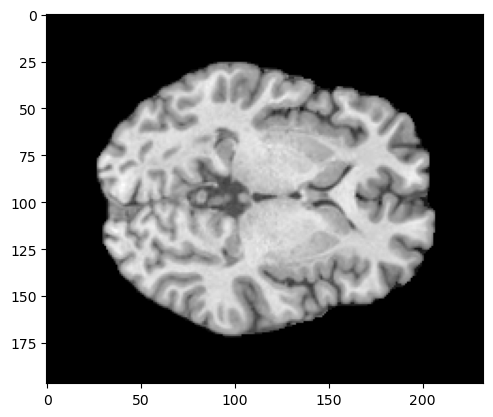

In [3]:
img_path = 'Patients_Displasya\sub-00H10_ses-01_acq-vol_desc-reg_desc-biascorr_desc-brainext_T1w.nii.gz'
z_idx = 70

img = nib.load(img_path)
data_3d = img.get_fdata()

z = z_idx

print(data_3d.shape)
print(data_3d.shape[0])
print(data_3d.shape[1])
print(data_3d.shape[2])

plt.imshow(data_3d[:, :, z], cmap='gray')
plt.show()

In [ ]:
option = 'coords'

for z in range(0, data_3d.shape[2]):
    data_2d_img, data_2d_coords = crop_black_slices_2d(data_3d[:, :, z])

    if len(data_2d_img) > 0:
        if data_2d_img.shape >= (110, 100):
            print(data_2d_coords)
            plt.imshow(data_2d_img, cmap='gray')
            plt.title(f"{data_2d_img.shape}")
            plt.show()

(160, 200)


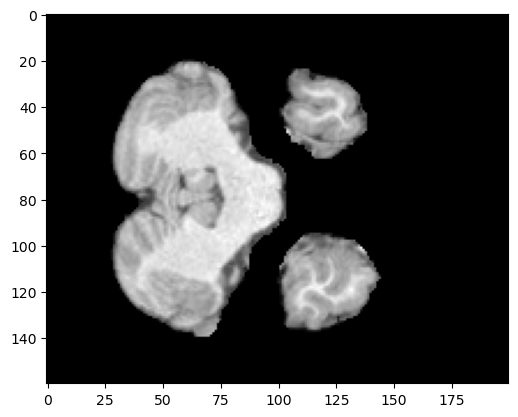

In [19]:
img_test = data_3d[18:197-19, 16:233-17, 30]
print(img_test.shape)
plt.imshow(img_test, cmap='gray')
plt.show()

grid = []
size = 40

for i in range(0, img_test.shape[0]-size+1, size):
    for j in range(0, img_test.shape[1]-size+1, size):
        grid.append([i, i+size-1, j, j+size-1]) #[x1, x2, y1, y2]

In [20]:
for item in grid:
    print(item)

[0, 39, 0, 39]
[0, 39, 40, 79]
[0, 39, 80, 119]
[0, 39, 120, 159]
[0, 39, 160, 199]
[40, 79, 0, 39]
[40, 79, 40, 79]
[40, 79, 80, 119]
[40, 79, 120, 159]
[40, 79, 160, 199]
[80, 119, 0, 39]
[80, 119, 40, 79]
[80, 119, 80, 119]
[80, 119, 120, 159]
[80, 119, 160, 199]
[120, 159, 0, 39]
[120, 159, 40, 79]
[120, 159, 80, 119]
[120, 159, 120, 159]
[120, 159, 160, 199]


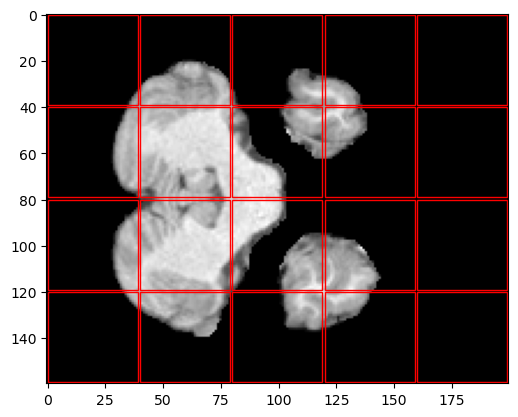

In [21]:
plt.imshow(img_test, cmap='gray')

for rect in grid:

    y1, y2, x1, x2 = rect[0], rect[1], rect[2], rect[3]

    plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='red', facecolor='none'))

plt.show()

In [ ]:
for item in grid:
    print(item)

IndexError: index 160 is out of bounds for axis 0 with size 160

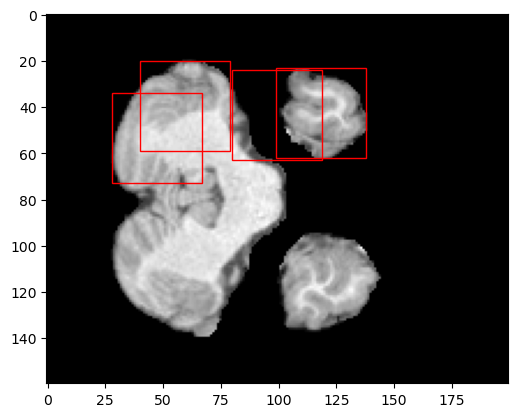

In [22]:
plt.imshow(img_test, cmap='gray')

for rect in grid:
    
    y1, y2, x1, x2 = move_grid(img_test, rect)

    plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='red', facecolor='none'))

plt.show()

[0, 39, 0, 39]


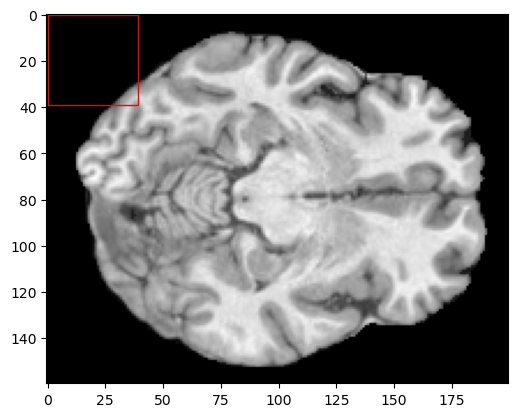

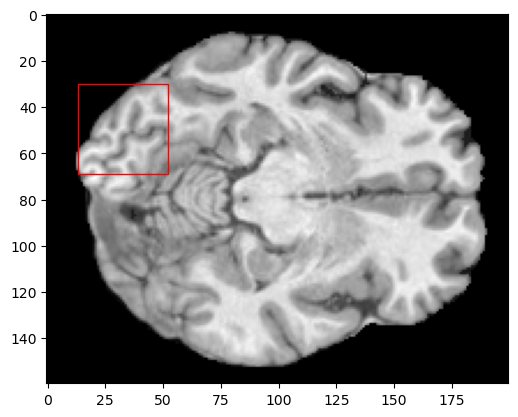

[0, 39, 40, 79]


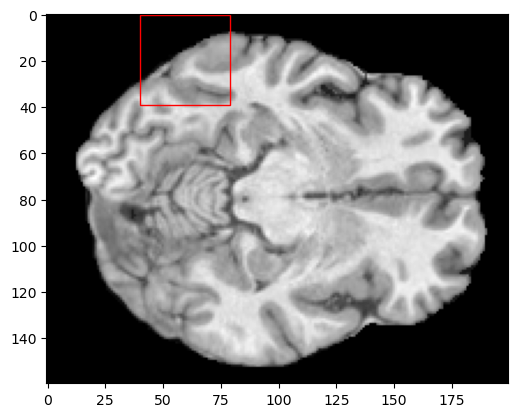

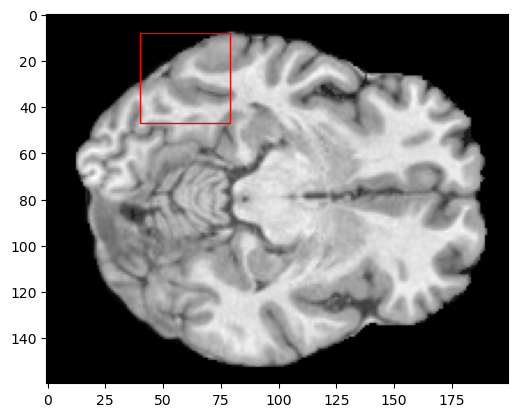

[0, 39, 80, 119]


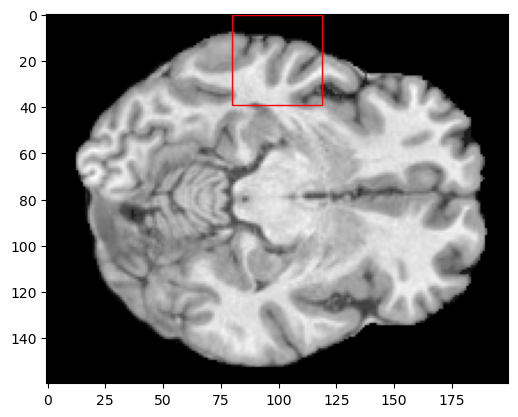

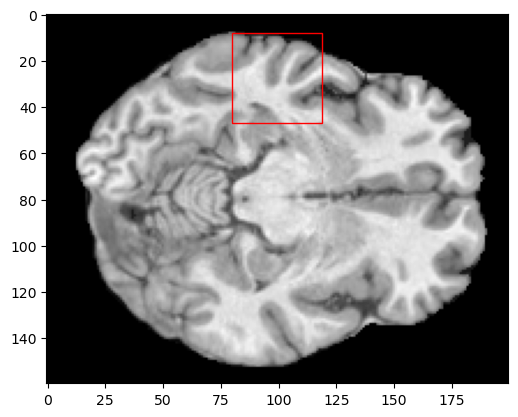

[0, 39, 120, 159]


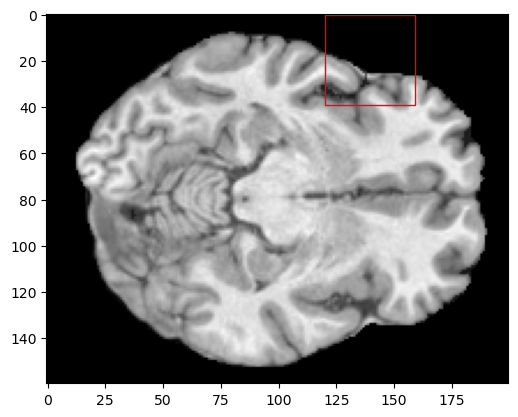

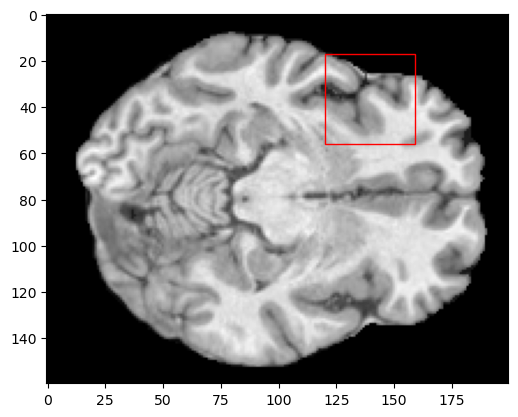

[0, 39, 160, 199]


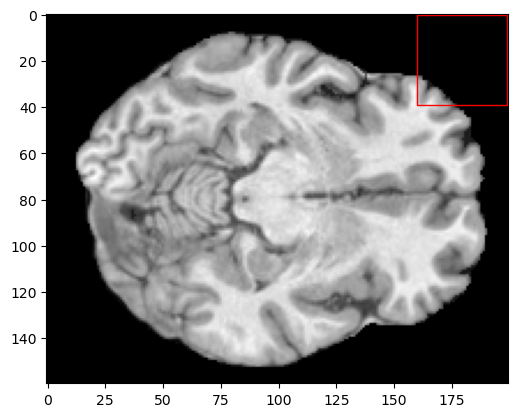

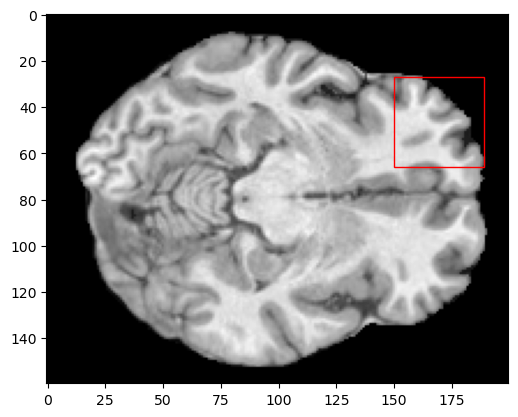

[40, 79, 0, 39]


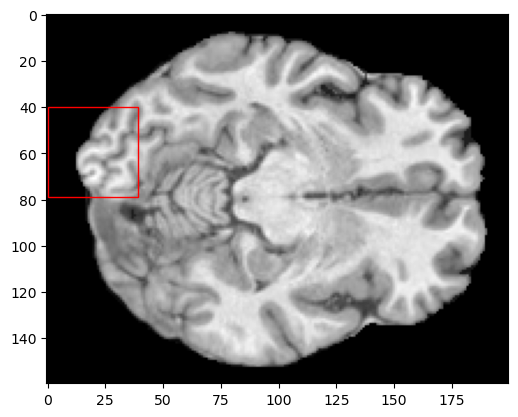

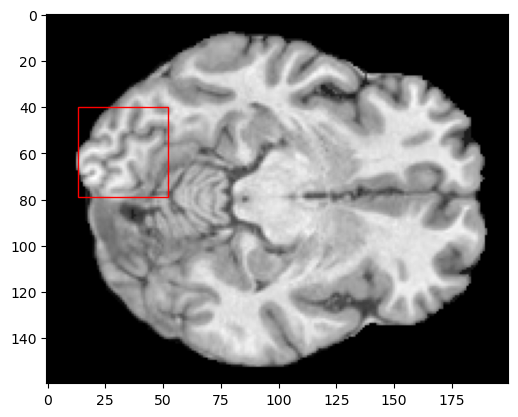

[40, 79, 40, 79]


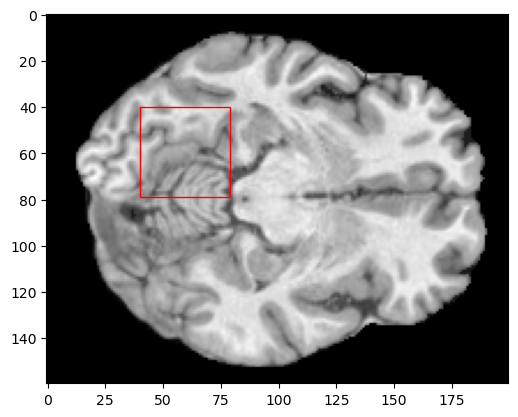

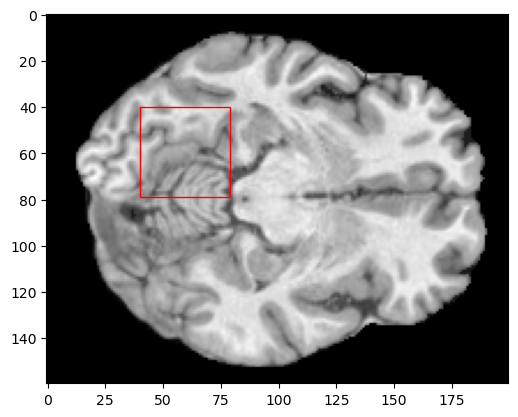

[40, 79, 80, 119]


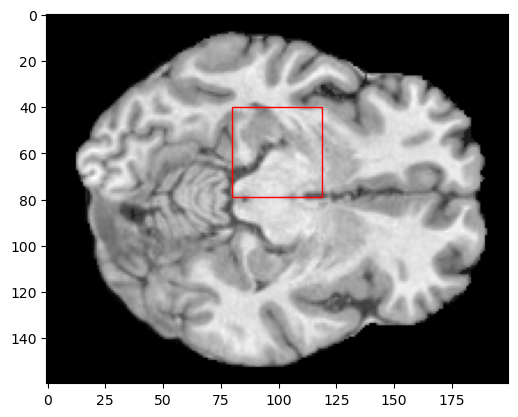

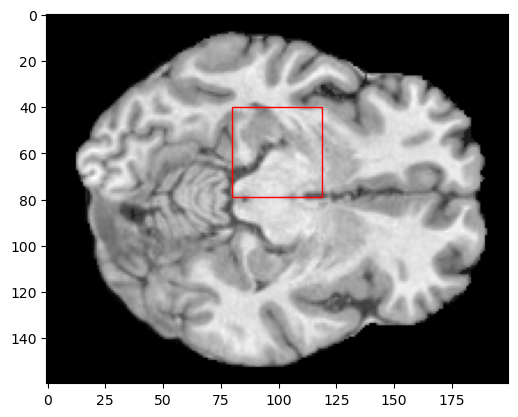

[40, 79, 120, 159]


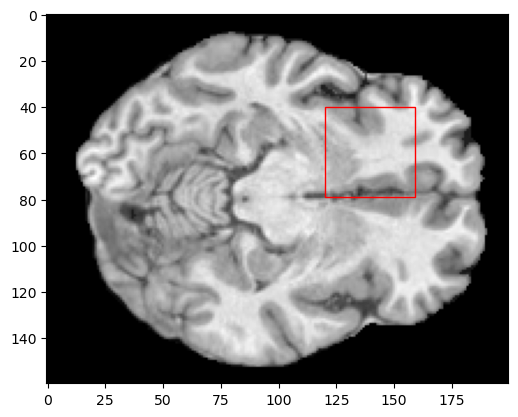

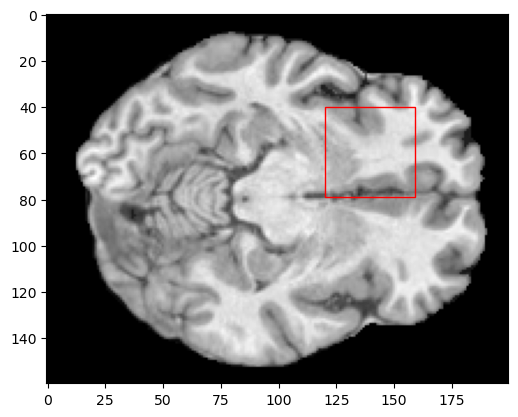

[40, 79, 160, 199]


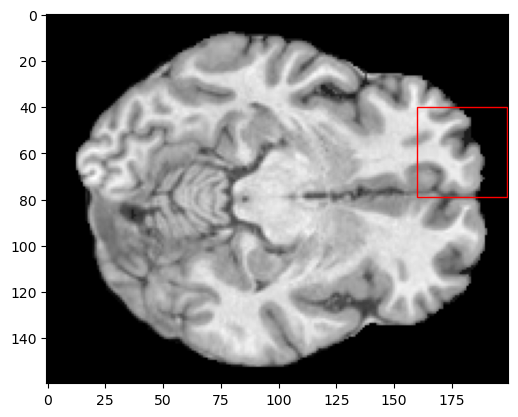

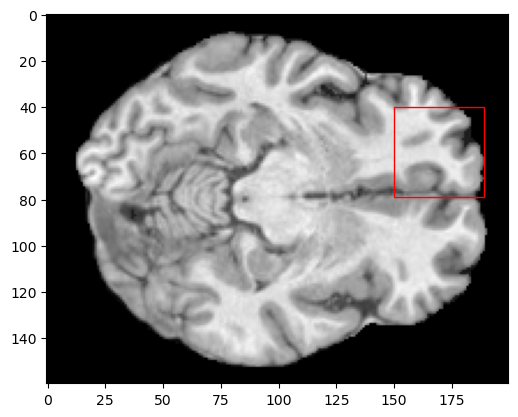

[80, 119, 0, 39]


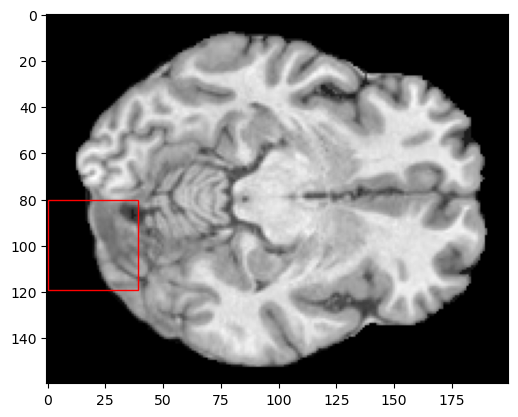

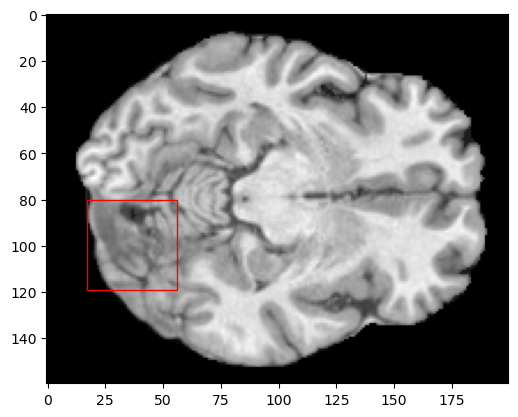

[80, 119, 40, 79]


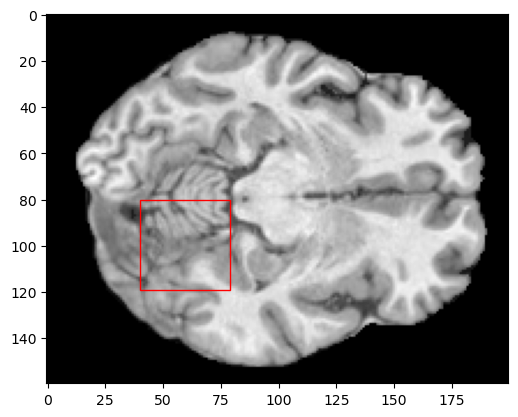

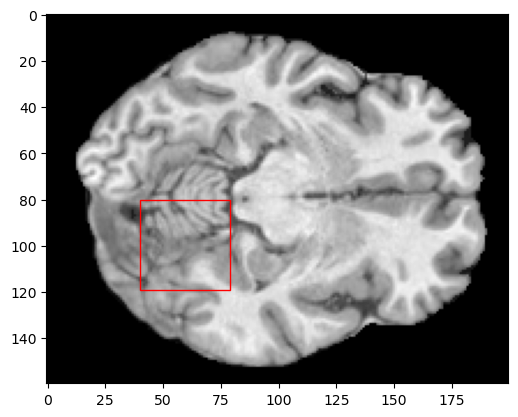

[80, 119, 80, 119]


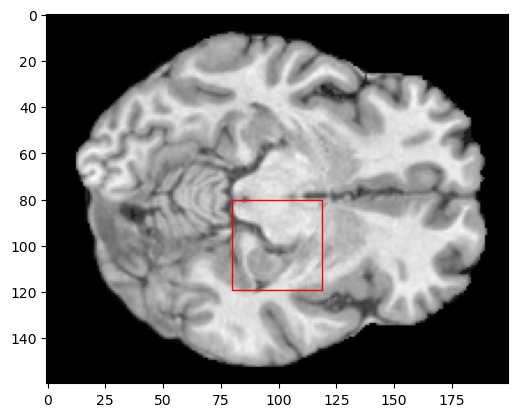

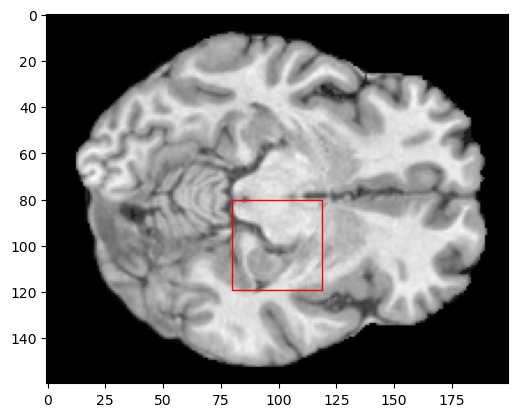

[80, 119, 120, 159]


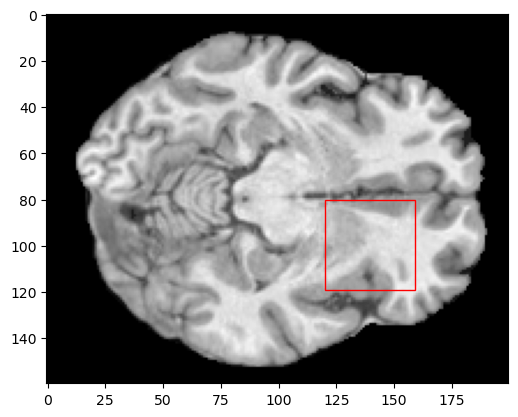

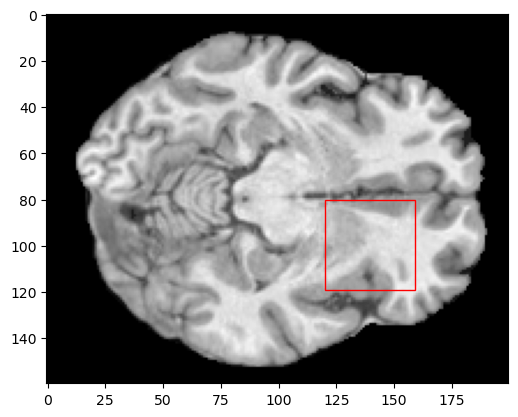

[80, 119, 160, 199]


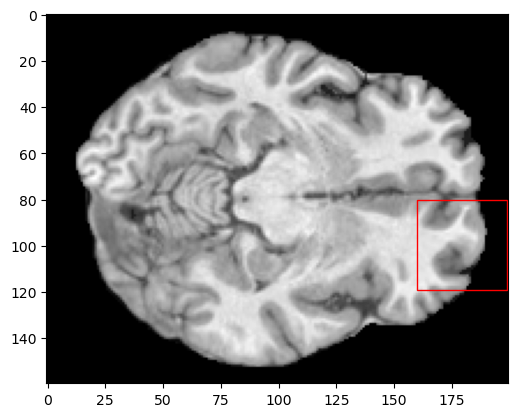

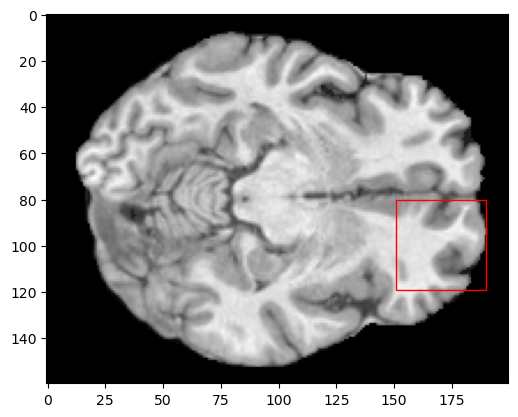

[120, 159, 0, 39]


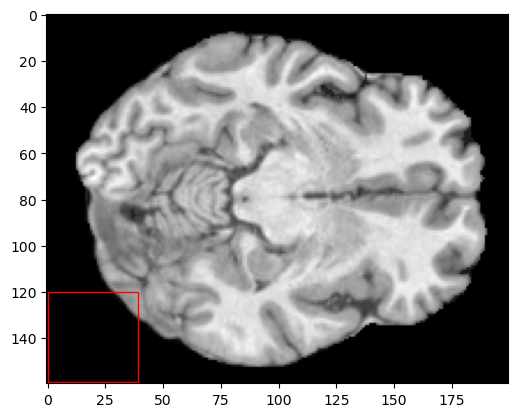

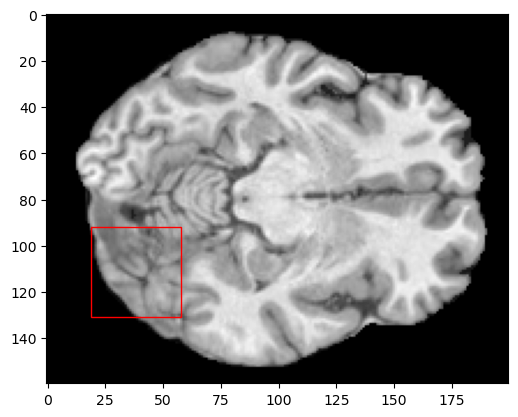

[120, 159, 40, 79]


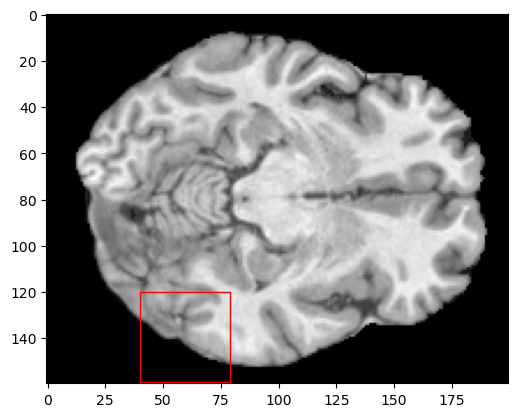

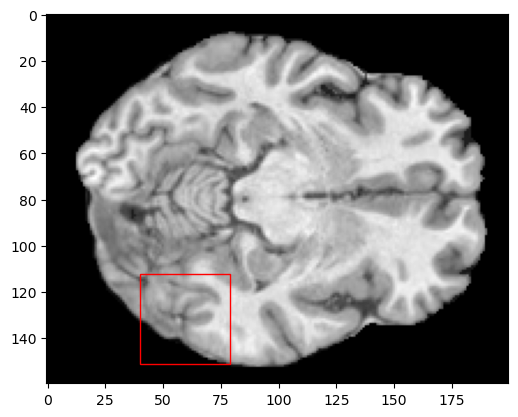

[120, 159, 80, 119]


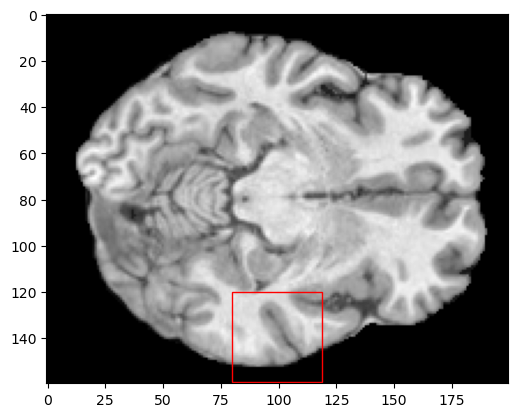

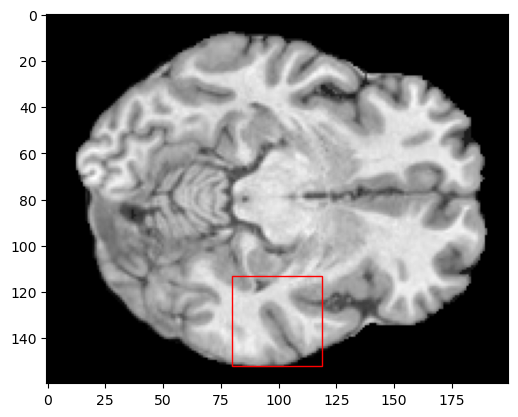

[120, 159, 120, 159]


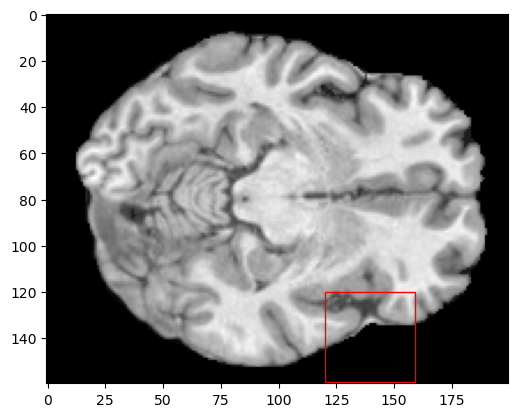

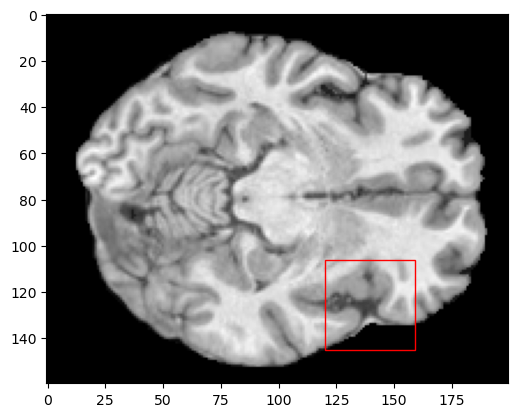

[120, 159, 160, 199]


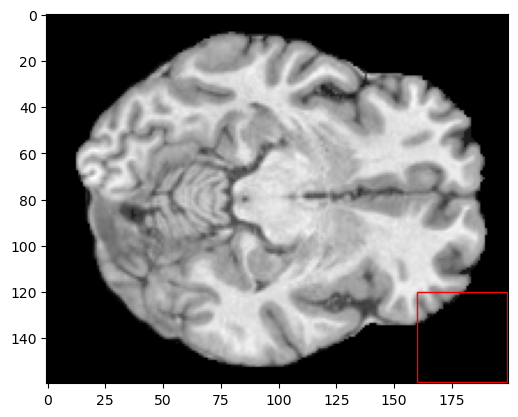

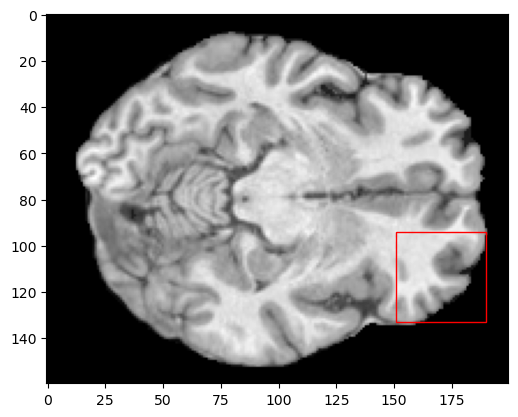

In [18]:
for grid_test in grid:
    img_crop = img_test[grid_test[0]:grid_test[1], grid_test[2]:grid_test[3]]

    print(grid_test)
    plt.imshow(img_test, cmap='gray')

    y1, y2, x1, x2 = grid_test[0], grid_test[1], grid_test[2], grid_test[3]
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='red', facecolor='none'))

    plt.show()

    while np.count_nonzero(img_test[y1, x1:x2]) == 0:
        y1 += 1
        y2 += 1
    while np.count_nonzero(img_test[y2, x1:x2]) == 0:
        y1 -= 1
        y2 -= 1

    while np.count_nonzero(img_test[y1:y2, x1]) == 0:
        x1 += 1
        x2 += 1
    while np.count_nonzero(img_test[y1:y2, x2]) == 0:
        x1 -= 1
        x2 -= 1

    plt.imshow(img_test, cmap='gray')

    plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='red', facecolor='none'))

    plt.show()
